# K-Means Clusterning Model Preparation

In [7]:
# Import libraries

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Read original song data extracted using Spotify API
songsData = pd.read_csv('../songs/songs_features.csv')
songsData.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


In [3]:
# Clean the data and extract relevant information

def cleanData(songs_data:pd.DataFrame) -> pd.DataFrame:
    # Modify time signature values
    for row in range(0, len(songs_data)):
        songs_data['time_signature'][row] = songs_data['time_signature'][row][0]

    # Select relevant columns for our model
    songs_data = songs_data.drop(columns=['id', 'artist_names', 'track_name', 'source', 'key', 'mode', 'weeks_on_chart', 'streams'])
    return songs_data

# Create a copy of modified data from original data
newSongsDF = cleanData(songsData)
newSongsDF.head()

/var/folders/qh/sckhy9cx1y13y4gg32cmhqv80000gn/T/ipykernel_24528/1050594338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_data['time_signature'][row] = songs_data['time_signature'][row][0]


,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms
0,4,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491
1,4,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680
2,4,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973
3,4,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856
4,4,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507


<AxesSubplot:>

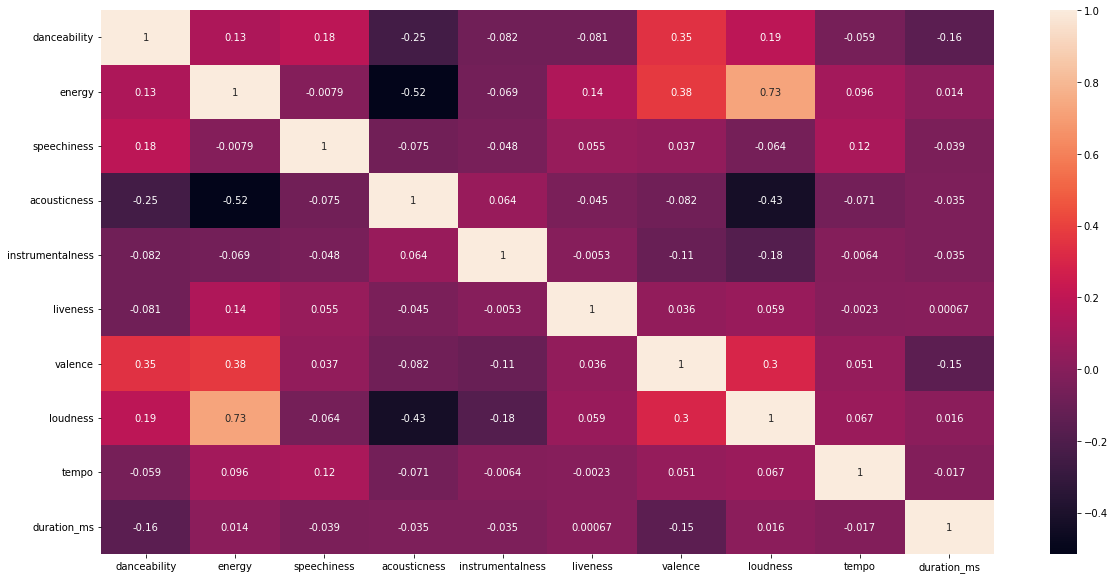

In [9]:
# Plotting a correlation matrix of our features
plt.figure(figsize=(20,10))
sns.heatmap(newSongsDF.corr(), annot=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-p

[Text(0.5, 0, 'Clusters'), Text(0, 0.5, 'Intertia')]

<Figure size 1080x720 with 0 Axes>

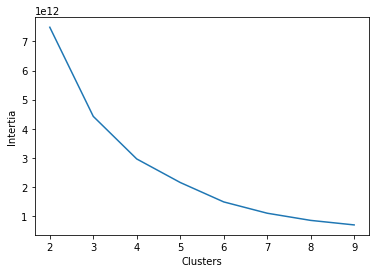

In [18]:
# Prepare a K-means cluster model
# Finding the optimal cluster size using elbow method

scoreList = []  # Stores the inertia of models with different cluster sizes
for i in range(2,10):
    kmeansModel = KMeans(n_clusters=i, random_state=3).fit(newSongsDF)
    predictions = kmeansModel.predict(newSongsDF)
    scoreList.append(kmeansModel.inertia_)

# Plot the scores on a graph to visualise elbow
plt.figure(figsize=(15,10))
pd.DataFrame(scoreList, index=range(2,10)).plot(legend=False).set(xlabel='Clusters', ylabel='Intertia')

Visibles elbows are formed at 3, 4 and 6 cluster size. Hence, we will take 4 as cluster size to train our model.

In [19]:
# Train the model with cluster size set to 4 and save it
songsPredictionModel = KMeans(n_clusters=4, random_state=3).fit(newSongsDF)
predictions = songsPredictionModel.predict(newSongsDF)

# save model
pickle.dump(songsPredictionModel, open('predictionModel.pkl', 'wb'))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
# Concat the songs data with their clusters to create a new
# dataset that will be used to display the predictions

songsPredictionData = {
    'SongName' : songsData['track_name'],
    'ArtistName' : songsData['artist_names'],
    'id' : songsData['id'],
    'cluster' : predictions
}

songsPredictionDataset = pd.DataFrame(songsPredictionData)
songsPredictionDataset.to_csv('../songs/predictionData.csv')
songsPredictionDataset.head()

,SongName,ArtistName,id,cluster
0,Still Got Time (feat. PARTYNEXTDOOR),"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,0
1,Growing Pains,Alessia Cara,003eoIwxETJujVWmNFMoZy,0
2,Mr. Brightside,The Killers,003vvx7Niy0yvhvHt4a68B,1
3,Best Life (feat. Chance The Rapper),"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,1
4,One Right Now (with The Weeknd),"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,0


### Visualising the clusters

In [21]:
# Mean values of each attribute in the cluster

# Concat the clusters wth feature data
newSongsDF['cluster'] = predictions

clustersMeanData = newSongsDF.groupby('cluster').agg('mean')
clustersMeanData

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms
cluster,,,,,,,,,,
0,0.685011,0.650248,0.116790,0.223312,0.008721,0.179367,0.501290,-6.057375,121.944448,195414.282231
1,0.662401,0.633487,0.113501,0.226747,0.010355,0.180292,0.451945,-6.456475,121.480066,243744.746471
2,0.708073,0.618668,0.137033,0.267483,0.019857,0.180243,0.534107,-6.686960,122.976900,148427.237548
3,0.609743,0.604996,0.145985,0.273036,0.025296,0.188354,0.401182,-7.028949,123.122506,345625.810277
